ValueError: The rows of 'x' must be equal

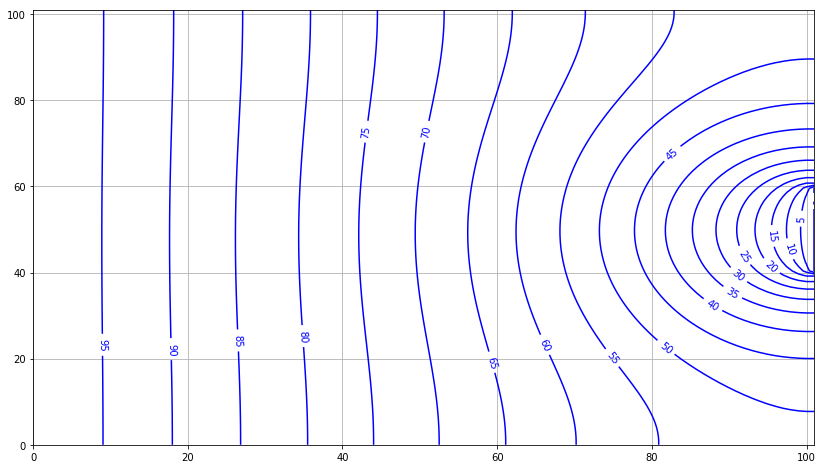

In [3]:
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
# définition des paramètres physiques de l'expérience
Vh = 100           # les cotés de la boite sont au potentiel nul
Vb = -100        # potentiel de plaque

# définition de la grille de calcul
N = 100                 # nombre de pas sur la grile (identique en Ox et Oy)
V = np.empty([N+1,N+1])     # création de la grille, en float par défaut / Va de 0 à 100 du coup


# critère de précision du calcul
EPS = 1e-3        # précision souhaitée pour le critère de convergence

# initialisation des compteurs
ecart = 1.0
iteration = 0

# // : division entière

a=N//2
# définition des conditions aux limites


# initialisation de l'intérieur de la grille
V[1:N,1:N] = 0.0

# début du calcul - enregistrement de la durée
tdebut = time.time()


r=int(np.floor(0.2*N)) # Taille du rayon en pourcentage par rapport à la largeur de la maille
RA=int((N-r)//2) #Partie gauche de vide 
RB=int(RA+r) #Partie droite de vide 
Mid=int(N//2)
#Mid=0


#V[1:-1,1:-1 Va de 1 à la derniere valeur -1 en x et pareil en y 

# boucle de calcul - méthode de Gauss-Seidel
while ecart > EPS:
    
    iteration += 1
    # sauvegarde de la grille courante pour calculer l'écart
    Vprec = V.copy()
    # calcul de la nouvelle valeur du potentiel sur la grille
    V[1:-1,1:-1]= 0.25*(V[0:-2,1:-1] +V[2:,1:-1] + V[1:-1,0:-2] + V[1:-1,2:])
    
    # je réaffecte les valeurs constantes sur les plaques
    V[0,:]  = Vh  # bord supérieur
    V[a:N+1,0]  = V[a:N+1,1]  # bord gauche inferieur
    V[0:a,0]  = V[0:a,1]  # bord gauche supérieur
    V[a:N+1,100] = V[a:N+1,99]  # bord droit inferieur
    V[0:a,100] = V[0:a,99]   # bord droit supérieur
    #V[0,:] = 0  # bord inférieur
    V[100,0:RA]  = V[99,0:RA]
    V[100,RB:N+1]  = V[99,RB:N+1]
    # critère de convergence
    V[100,40:60]=0
    ecart = np.max(np.abs(V-Vprec))


# Affichage des résultats
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)

# dessin des deux plaques
#plt.plot([60,100],[50,50],'b-', lw = 1)  # plaque gauche
#plt.plot([0,40],[50,50],'r-', lw = 1)  # plaque droite

# dessin de la grille de calcul
plt.grid()

Ey,Ex = np.gradient(V)
Ey=-Ey
Ex=-Ex
# tracé des équipotentielles
x = np.linspace(0,N+1,N+1)
y = np.linspace(0,N+1,N+1)
X,Y = np.meshgrid(x,y)
equ = plt.contour(Y,X,V,20,colors='b')
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.clabel(equ, fontsize=10, inline=1,fmt='%1.0f')
A=np.linspace(0,100,40)
B = 75*np.ones(len(A))
seed_points = np.array([A,B])
plt.streamplot(Y, X, Ex, Ey,linewidth=1,arrowstyle='->',density=10,start_points=seed_points.T,color='orange')
# tracé de la grille

In [18]:
V = np.empty([N+1,N+1])
np.shape(V)

(101, 101)

In [36]:
np.shape(V[1:-1,1:-1])

(99, 99)

In [7]:
Ex[100,:]

array([-0.00000000e+000,  9.88544795e-003,  2.96811892e-002,
        4.95517097e-002,  6.95476786e-002,  8.97210093e-002,
        1.10125396e-001,  1.30816892e-001,  1.51854545e-001,
        1.73301103e-001,  1.95223819e-001,  2.17695368e-001,
        2.40794916e-001,  2.64609381e-001,  2.89234921e-001,
        3.14778729e-001,  3.41361209e-001,  3.69118628e-001,
        3.98206413e-001,  4.28803258e-001,  4.61116315e-001,
        4.95387831e-001,  5.31903733e-001,  5.71004895e-001,
        6.13102144e-001,  6.58696573e-001,  7.08407577e-001,
        7.63012349e-001,  8.23502868e-001,  8.91170425e-001,
        9.67735035e-001,  1.05555110e+000,  1.15794904e+000,
        1.27983372e+000,  1.42880198e+000,  1.61739728e+000,
        1.86809623e+000,  2.22556219e+000,  2.79038797e+000,
        6.78385138e+000,  5.21271629e+000, -3.95252517e-322,
       -3.95252517e-322, -3.95252517e-322, -3.95252517e-322,
       -3.95252517e-322, -3.95252517e-322, -3.95252517e-322,
       -3.95252517e-322,

In [5]:
iteration

16977

In [9]:
A=[1,2,3,4,5,6]
B=[1,2,3,4,5,7]
np.savetxt("Array.txt", [A,B])

In [12]:
[C,D]=np.loadtxt("Array.txt")

In [14]:
D

array([1., 2., 3., 4., 5., 7.])